In [1]:
#data from this kaggle comp.: https://www.kaggle.com/c/bnp-paribas-cardif-claims-management
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
##check out tutorial here:
##http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb
df_train = pd.read_csv('train.csv')
#print(np.shape(df_train))
df_train.head()
print np.shape(df_train)

(114321, 133)


In [2]:
##CHOOSE A SUBSET TO WORK WITH INITIALLY
df_train = df_train[0:500]
df_train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
X_test = pd.read_csv('test.csv')
# X_test = X_test[0:5000]
X_test.head()
print(np.shape(X_test))
X_test = X_test[0:1000]
print(np.shape(X_test))

(114393, 132)
(1000, 132)


# WE FIRST DEAL WITH MISSING VALUES

In [4]:
# from sklearn.decomposition import PCA #import principal component analysis
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA #import principal component analysis
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
df_train_nt = df_train.drop('target', 1)
frames = [df_train_nt , X_test]
X = pd.concat( frames )
X_hot = pd.get_dummies( X )
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit( X_hot )
X_hot_imp = imp.transform( X_hot )
df_all = scale(X_hot_imp) #scaled data
np.shape(df_all)

(1500, 1559)

# WE NOW DO SOME PCA!

/Users/hugobowne-anderson/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/hugobowne-anderson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


(500, 2)


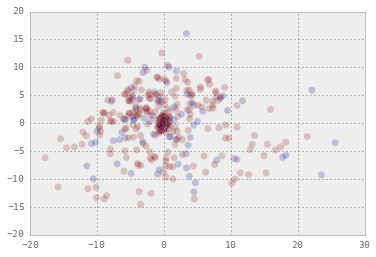

The amount of variance explained by the 1st & 2nd principal components are 0.019 & 0.012 respectively.


In [6]:
from sklearn.decomposition import PCA #import principal component analysis
pca = PCA(n_components=2) #Instantiate the model & set parameters
df2 = pd.DataFrame( df_all[0:500,:] ) 
# df2.head()
pca.fit(df2); #Fit the model
df_pca = pca.transform(df2)#Apply the model. For embeddings / decompositions, this is transform.
print(df_pca.shape)
fig, ax = plt.subplots();
ax.scatter(df_pca[:, 0], df_pca[:, 1] , c = df_train['target'] , s = 50 , alpha=0.2);
ax.legend(numpoints=1 , loc='upper left');
plt.show();
print("The amount of variance explained by the 1st & 2nd principal components are %s & %s respectively." 
      % (round(pca.explained_variance_ratio_[0],3) , round(pca.explained_variance_ratio_[1],3)))
#print("Thus the 1st 2 components explain >99% of the variance in the data: moreover, looking " +
     # "at the plot, there seems to be some distinction between target classes. All this is to say" +
     # " that there is hope for us still!")

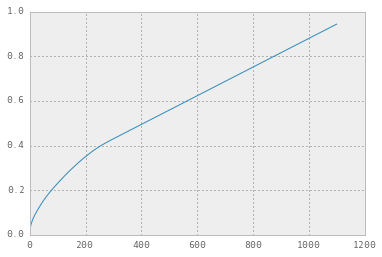

In [9]:
from sklearn.decomposition import PCA #import principal component analysis
ncomp = 1100
pca = PCA(n_components=ncomp) #Instantiate the model & set parameters
df2 = pd.DataFrame( df_all[0:10000,:] ) 
# df2.head()
pca.fit(df2); #Fit the model
plt.plot(range(1,ncomp+1) , np.cumsum(pca.explained_variance_ratio_))
# print pca.explained_variance_ratio_

In [17]:
print np.shape(df2)
df_red= pca.fit_transform(df2)
df_red = df_red[0:500]
print np.shape(df_red)

(1500, 1559)
(500, 1100)


# BEFORE MACHINE LEARNING, WE KEEP A HOLD-OUT SET TO TEST OUR MODELS ON THE VERY END:

In [16]:
np.shape(df_train)

(1500, 1100)

In [18]:
#SPLIT DATA INTO TRAINING & TESTING HERE
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_red, df_train['target'], test_size = 0.2, 
                                                    random_state=0)
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (400, 1100)
y_train shape: (400,)
X_test shape: (100, 1100)
y_test shape: (100,)


# NOW TO MACHINE LEARN! FIRST, LET'S TRY A LINEAR SVM WITH K-FOLD CROSS VALIDATION

In [ ]:
import time
from sklearn.grid_search import GridSearchCV
t0 = time.time()
from sklearn import linear_model
logistic = linear_model.LogisticRegression() # Instantiate the model.
tuned_parameters = {'C':10.**np.arange(-10,5)}
grid_search = GridSearchCV( logistic , param_grid = tuned_parameters , scoring= 'log_loss', cv = 5 ,verbose = 1 )
#number of folds must be < than the size of the least populated class
grid_search.fit(X_train, y_train);
print(grid_search.best_params_)
print(grid_search.best_score_)
##see here about the scoring:
##http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
##E.g. gives "accuracy" for SVMs:
##http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
plt.plot([c.mean_validation_score for c in grid_search.grid_scores_], label="validation error")
plt.xticks(np.arange(len(tuned_parameters['C'])), tuned_parameters['C']); plt.xlabel("C"); plt.ylabel("log loss score");plt.legend(loc='best');
#see this thread concerning mean_training_score:
#http://stackoverflow.com/questions/23389334/how-to-calculate-the-mean-training-score-using-gridsearchcv-in-scikit-learns
t1 = time.time()
total_time = t1 - t0
print total_time